<img src='https://coopersystem.com.br/wp-content/uploads/2020/10/blogpost-inteligencia-artificial-fatos-1024x322.png' height="100%" width="3500">

# <font color=blue|blue|red>Case Inteligência Artificial</font> 

Opa, tudo bom? Seja muito bem vindo ao Case de IA!

<ins>**_Qual será sua task:_**</ins>

"Você foi contratado como um Cientista de Dados de uma grande empresa. Logo no primeiro dia de trabalho seus superiores lhe mostraram os diversos problemas e desafios que você teria que resolver. Um deles está relacionado à uma base de dados do naufrágio do Titanic e seu objetivo seria desenvolver um modelo de Machine Learning que dê a previsão de sobrevivência para um passageiro qualquer que seja fornecido como input. Você logo de cara lembrou do KNN, um ótimo modelo de classificação e decidiu aplicá-lo na base de dados"

### Base de Dados:
- O nome do arquivo com a base de dados é: "titanic_data.csv"

- Abaixo estão as descrições das colunas do nosso Dataset:
    - passengerid = ID do passageiro do navio (código primário).
    - survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não       sobreviveu.
    - pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior       classe.
    - name = Nome do passageiro
    - sex = Gênero do passageiro, sendo masculino e feminino.
    - age = Idade do passageiro na data da ocorrência do naufrágio.
    - sibsp = Número de irmãos / cônjuges a bordo.
    - parch = Número de pais / filhos a bordo.
    - ticket = Código do ticket.
    - fare = Valor da passagem.
    - cabin = Código de identificação da Cabine.
    - embarked = Local ondem o passageiro embarcou no navio.

### Sua Estratégia:

Para não ter erro em sua entrega, você decidiu iniciar o projeto estudando um pouco mais sobre o KNN. Ao avisar seu chefe Douglas, ele lhe deu a liberdade de pesquisar por toda a internet e recomendou as seguintes fontes:

- (FEA.Dev) Machine Learning usando Python - modelo KNN (AULA PRÁTICA): https://www.youtube.com/watch?v=xL2RK0QYtHc
- StatQuest: K-nearest neighbors, Clearly Explained: https://www.youtube.com/watch?v=HVXime0nQeI
- Machine Learning na prática com o algoritmo KNN em Python: https://minerandodados.com.br/machine-learning-na-pratica-knn-python/

Além das recomendações, por ser seu primeiro projeto, Douglas resolveu lhe ajudar dando algumas dicas:

1. Explore um pouco a base de dados, entenda as colunas e qual o será o seu objetivo.


2. Faça uma análise inicial dos dados e realize um tratamento deles (se necessário).


3. Separe os dados em conjunto de treino(70%) e conjunto de test (30%)
    - Caso não saiba o que é isso, de uma googlada.


4. Crie o modelo
    - Recomendação de biblioteca: scikit-learn (o famoso sklearn)
    
    
5. Procure por métricas de avaliação do seu modelo

### Meta proposta pelo Douglas

Para ser considerado um bom modelo, Douglas colocou como meta uma precisão de pelo menos 60% no conjunto de teste (Obs: Lembre-se que a precisão do modelo no conjunto de treinamento e no conjunto de teste serão diferentes e o que Douglas está avaliando é no conjunto de teste)

### Dúvidas

Caso tenha dúvidas ou problemas no código sinta-se livre para chamar qualquer membro do grupo de estudo de IA do FEA.Dev.

### <font color=blue|blue|red>A partir de agora é o seu momento de desenvolver o modelo, Boa Sorte!</font> 

### Limpeza e tratamento dos dados:

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# importando dados
df = pd.read_csv('titanic_data.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# verificando algumas informações
print(df.info())
display(df.describe())
display(df.describe(include=['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Note que temos alguns valores nulos para as colunas Embarked, Cabin e Age. É possível inferir que a cabine na qual o passageiro estava localizado impacta sua probabilidade de sobrevivência no acidente, mas como há uma grande ausência dessa informação vamos nos livrar dela. Além disso, o nome da pessoa, seu ticket e seu Passenger ID não são variáveis de interesse.

In [4]:
# Removendo algumas colunas
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
display(df.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Vamos olhar um pouco melhor para as colunas Age e Embarked, a fim de decidir como tratar os dados faltantes.

<AxesSubplot:title={'center':'Embarked'}, ylabel='Frequency'>

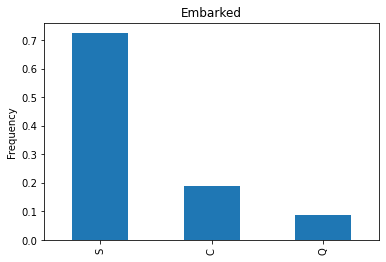

In [5]:
# Plotando gráfico de barras com contagem da variável Embarked
df['Embarked'].value_counts(normalize=True).plot(kind='bar', title='Embarked', ylabel='Frequency')

Como mais de 70% dos tripulantes embarcou em "S" e há apenas dois dados faltando, iremos atribuir S a eles.


In [6]:
# Substituindo valores faltantes em Embarked
df['Embarked'].fillna("S", inplace=True)

<AxesSubplot:title={'center':'Age'}, ylabel='Frequency'>

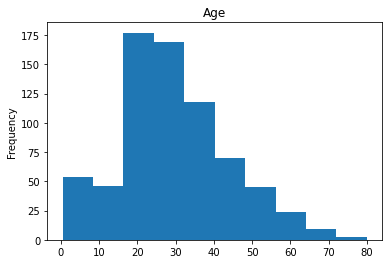

In [7]:
# Plotando histograma da variável Age
df['Age'].plot(kind='hist', title='Age')

Podemos substituir os valores nulos de Age com a média das idades.

In [8]:
# Substituindo valores faltantes em Age
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Agora que não temos mais nenhum valor nulo, podemos prosseguir.
É necessário que todas as variáveis sejam numéricas. Assim sendo, vamos transformar as variáveis object em binárias. Além disso, como se o indivíduo é do sexo masculino necessariamente ele não é do feminino, para cada n possíveis valores que a variável assume vamos gerar n-1 variáveis binárias.

In [9]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Vamos transformar as variáveis SibSP, Parch e Fare em binárias, atribuindo 1 para os valores acima da mediana e 0 para os abaixo.

In [10]:
for j in ['Fare', 'SibSp', 'Parch']:
    df.loc[df[j] <= df[j].median(), j] = 0
    df.loc[df[j] > df[j].median(), j] = 1 

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0.0,1,0,1
1,1,1,38.0,1,0,1.0,0,0,0
2,1,3,26.0,0,0,0.0,0,0,1
3,1,1,35.0,1,0,1.0,0,0,1
4,0,3,35.0,0,0,0.0,1,0,1


In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.317621,0.239057,0.498316,0.647587,0.086420,0.725028
std,0.486592,0.836071,13.002015,0.465813,0.426747,0.500278,0.477990,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Matriz de Correlação

<AxesSubplot:>

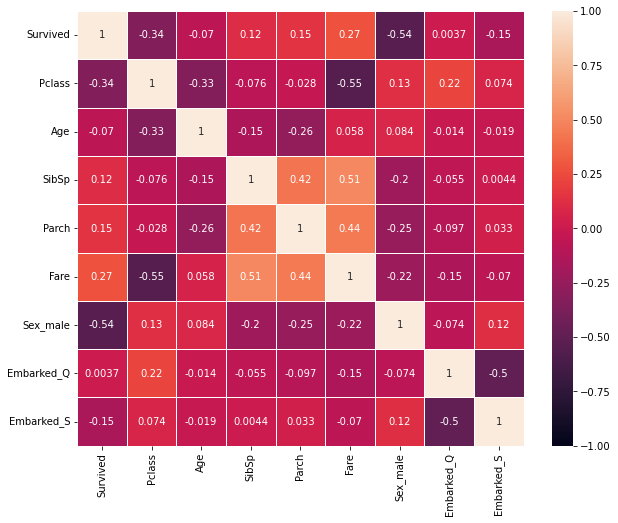

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, linewidths=.5, ax=ax)

A partir dessa matriz, vemos que as variáveis que tem a maior correlação com a sobrevivência do passageiro é seu sexo (correlação negativa com Sex_male indica que mais mulheres sobreviveram) e sua classe de embarque (valor negativo indica que passageiros da 1ª classe sobreviveram mais que indivíduos de 3ª classe).

### Aplicando o Modelo KNN

In [13]:
# Array das features
X = np.array(df.drop(['Survived'], 1))

# Array Target
y = np.array(df['Survived'])

C:\Users\gabfo\AppData\Local\Temp/ipykernel_12712/2985619847.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Survived'], 1))


In [14]:
# importando funções para o funcionamento do modelo
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

Separando o Dataset em treino e teste e normalizando variáveis

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state=0)

In [16]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [17]:
# Definindo o modelo
clf = neighbors.KNeighborsClassifier(n_neighbors=19, metric='euclidean')

In [18]:
# Treinando o modelo
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [19]:
# Verificando a acuracia do modelo
accuracy = clf.score(X_test, y_test)
accuracy

0.8022388059701493